In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import seaborn as sns

In [2]:
data = pd.read_csv('data/data_hackathon_v04.csv',sep='|')
data.head()

,ride_id,created_at,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,user_id,driver_id,ride_distance,canceled_by_client,canceled_by_driver,ride_to_suburb
0,000002b3a3014388a6c62fdda1d03de1n,2018-12-14 23:00:00.043000000,49.824671,24.013246,49.784729,24.060303,3900450045004500300042003700310037003800460031...,a429c637c1244bb7a1d606d2b9987bdd,7.97,0,0,0
1,000013de085e4be4a2cd27d9112f7bdbn,2018-10-13 23:59:00.580000000,49.837906,24.029772,49.841217,23.974363,6227785C7862375C7863623F5C7866652E285F2D5C7861...,NaN,5.62,1,0,0
2,000040911549444d8ad461c69370e883n,2018-08-25 21:40:52.537000000,49.839718,23.994425,49.840610,24.029135,62277C6C5C7866386C572C795C7838315C7831645C7863...,7323767ede0349d1a7bfe743a091d63c,3.17,0,0,0
3,0000759fc38a410e8d8802610800ccacn,2018-12-08 13:43:41.357000000,49.829708,24.044172,49.869137,24.010246,62275C7864335C78393135635C6E5C7830355C7839645C...,NaN,5.87,1,0,0
4,0000e61e5282484d943291df7266ee33n,2019-01-18 09:18:44.377000000,49.837013,24.034357,49.832710,23.999216,3300360037004600420041003600300032003500410033...,2913413c2bf748d7932d1d587c8aef13,3.39,0,0,0


## EDA

Text(0,0.5,'Number_calls')

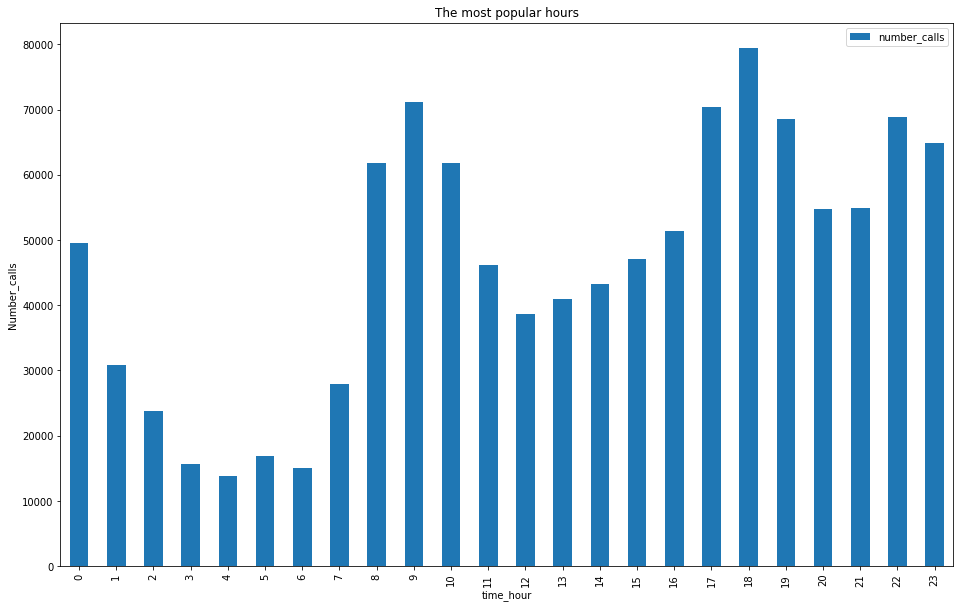

In [3]:
import seaborn as sns
data['created_at'] = pd.to_datetime(data['created_at'])
commutes = data['created_at'].dt.hour.value_counts().to_frame()

dff = pd.DataFrame({'time_hour':commutes.index,'number_calls':commutes.created_at})
dff = dff.sort_values('time_hour',ascending=True)
dff.plot(x="time_hour", y=["number_calls"],figsize = (16,10), kind="bar")
plt.title('The most popular hours')
plt.ylabel('Number_calls')


In [4]:
# data.groupby(['driver_id'])['canceled_by_client'].apply(len).to_frame().sort_values('canceled_by_client')


In [5]:
# data.groupby(['user_id'])['canceled_by_driver'].apply(len).to_frame().sort_values('canceled_by_driver')


In [6]:
data['coordinate_from'] = data.apply(lambda x: [x['pickup_lat']] + [x['pickup_lng']] , axis=1)
data['coordinate_to'] = data.apply(lambda x: [x['dropoff_lat']] + [x['dropoff_lng']] , axis=1)
data.head()


,ride_id,created_at,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,user_id,driver_id,ride_distance,canceled_by_client,canceled_by_driver,ride_to_suburb,coordinate_from,coordinate_to
0,000002b3a3014388a6c62fdda1d03de1n,2018-12-14 23:00:00.043,49.824671,24.013246,49.784729,24.060303,3900450045004500300042003700310037003800460031...,a429c637c1244bb7a1d606d2b9987bdd,7.97,0,0,0,"[49.82467065, 24.01324558]","[49.784729, 24.06030273]"
1,000013de085e4be4a2cd27d9112f7bdbn,2018-10-13 23:59:00.580,49.837906,24.029772,49.841217,23.974363,6227785C7862375C7863623F5C7866652E285F2D5C7861...,NaN,5.62,1,0,0,"[49.83790588, 24.0297718]","[49.84121704, 23.97436332]"
2,000040911549444d8ad461c69370e883n,2018-08-25 21:40:52.537,49.839718,23.994425,49.840610,24.029135,62277C6C5C7866386C572C795C7838315C7831645C7863...,7323767ede0349d1a7bfe743a091d63c,3.17,0,0,0,"[49.83971786, 23.99442481]","[49.8406105, 24.02913475]"
3,0000759fc38a410e8d8802610800ccacn,2018-12-08 13:43:41.357,49.829708,24.044172,49.869137,24.010246,62275C7864335C78393135635C6E5C7830355C7839645C...,NaN,5.87,1,0,0,"[49.82970809, 24.04417228]","[49.86913681, 24.01024627]"
4,0000e61e5282484d943291df7266ee33n,2019-01-18 09:18:44.377,49.837013,24.034357,49.832710,23.999216,3300360037004600420041003600300032003500410033...,2913413c2bf748d7932d1d587c8aef13,3.39,0,0,0,"[49.83701324, 24.03435707]","[49.83271026, 23.99921607]"


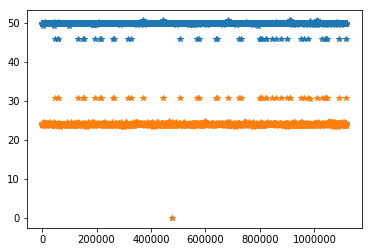

In [7]:
plt.plot(data['pickup_lat'],'*')
plt.plot(data['pickup_lng'],'*')

In [8]:
data = data[data['pickup_lng']<24.3]
data = data[data['pickup_lng']!=0]

In [9]:
np.unique(data['coordinate_from']).size

74148

# Clustering

In [10]:
X = np.array(data['coordinate_from'].tolist())
k_m_dens = KMeans(n_clusters = 100, random_state=1).fit(X)
data['labels_by_density'] = k_m_dens.predict(X)
data['new_coordinate_by_dens'] = k_m_dens.labels_

In [11]:
del data['new_coordinate_by_dens']
test1 = pd.DataFrame(index = [i for i in range(100)])
test1['labels_by_density'] = [i for i in range(100)]
new_coordinate_lat = [i[0] for i in k_m_dens.cluster_centers_ ]
new_coordinate_lon = [i[1] for i in k_m_dens.cluster_centers_ ]
test1['new_coordinate_lat'] = new_coordinate_lat
test1['new_coordinate_lon'] = new_coordinate_lon
test1['new_coordinate_by_dens'] = test1.apply(lambda x: [x['new_coordinate_lat']] + [x['new_coordinate_lon']] , axis=1)
del test1['new_coordinate_lat'], test1['new_coordinate_lon']
test1.head()

,labels_by_density,new_coordinate_by_dens
0,0,"[49.819061259707496, 24.003143096248056]"
1,1,"[49.83203425287154, 24.017942384573523]"
2,2,"[49.79633886884069, 24.06358745185933]"
3,3,"[49.82404826582329, 23.899542374538154]"
4,4,"[49.8553641169671, 24.029633224977122]"


In [12]:
df = pd.merge(data,test1, how='left', on='labels_by_density')
df.head()

,ride_id,created_at,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,user_id,driver_id,ride_distance,canceled_by_client,canceled_by_driver,ride_to_suburb,coordinate_from,coordinate_to,labels_by_density,new_coordinate_by_dens
0,000002b3a3014388a6c62fdda1d03de1n,2018-12-14 23:00:00.043,49.824671,24.013246,49.784729,24.060303,3900450045004500300042003700310037003800460031...,a429c637c1244bb7a1d606d2b9987bdd,7.97,0,0,0,"[49.82467065, 24.01324558]","[49.784729, 24.06030273]",49,"[49.82201177520198, 24.013996980712]"
1,000013de085e4be4a2cd27d9112f7bdbn,2018-10-13 23:59:00.580,49.837906,24.029772,49.841217,23.974363,6227785C7862375C7863623F5C7866652E285F2D5C7861...,NaN,5.62,1,0,0,"[49.83790588, 24.0297718]","[49.84121704, 23.97436332]",43,"[49.83821222818285, 24.031521094445523]"
2,000040911549444d8ad461c69370e883n,2018-08-25 21:40:52.537,49.839718,23.994425,49.840610,24.029135,62277C6C5C7866386C572C795C7838315C7831645C7863...,7323767ede0349d1a7bfe743a091d63c,3.17,0,0,0,"[49.83971786, 23.99442481]","[49.8406105, 24.02913475]",10,"[49.83901199512102, 23.994690441992052]"
3,0000759fc38a410e8d8802610800ccacn,2018-12-08 13:43:41.357,49.829708,24.044172,49.869137,24.010246,62275C7864335C78393135635C6E5C7830355C7839645C...,NaN,5.87,1,0,0,"[49.82970809, 24.04417228]","[49.86913681, 24.01024627]",60,"[49.8281512080706, 24.041817552224003]"
4,0000e61e5282484d943291df7266ee33n,2019-01-18 09:18:44.377,49.837013,24.034357,49.832710,23.999216,3300360037004600420041003600300032003500410033...,2913413c2bf748d7932d1d587c8aef13,3.39,0,0,0,"[49.83701324, 24.03435707]","[49.83271026, 23.99921607]",43,"[49.83821222818285, 24.031521094445523]"


Text(0,0.5,'Number_calls')

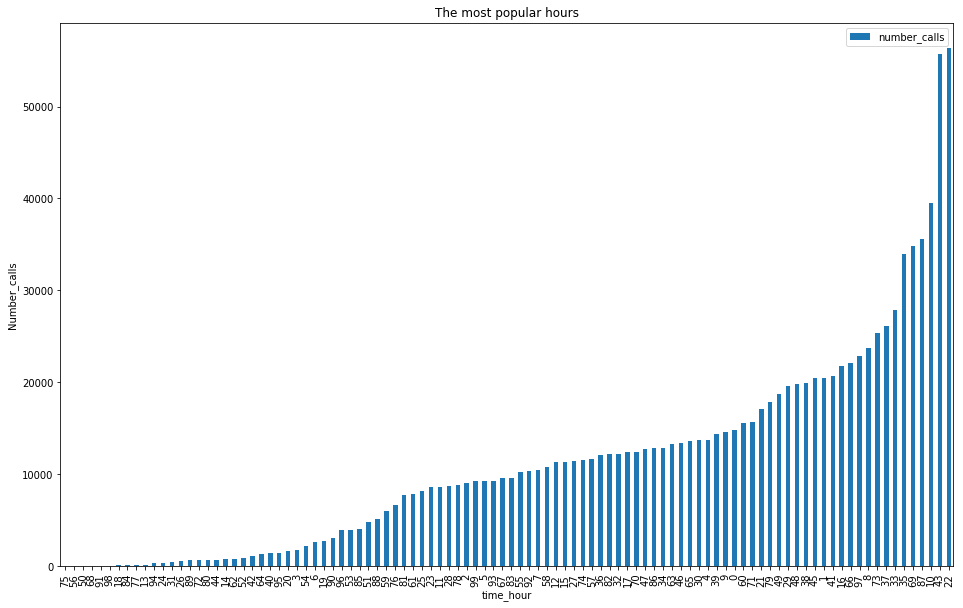

In [13]:
commutes = df.groupby(['labels_by_density'])['ride_id'].apply(len).sort_values().to_frame()

dff = pd.DataFrame({'time_hour':commutes.index,'number_calls':commutes.ride_id})
dff = dff.sort_values('number_calls',ascending=True)
dff.plot(x="time_hour", y=["number_calls"],figsize = (16,10), kind="bar")
plt.title('The most popular hours')
plt.ylabel('Number_calls')


In [16]:
df['hours'] = df['created_at'].apply(lambda x:x.hour)

In [17]:
np.unique(df['new_coordinate_by_dens']).size

100

In [80]:
# X_ = np.array([list(x) for x in set(tuple(x) for x in testdata)])
# k_m_square = KMeans(n_clusters = 100, random_state=1).fit(X_)
# data['labels_by_square'] = k_m_square.predict(X_)

In [19]:
df

,ride_id,created_at,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,user_id,driver_id,ride_distance,canceled_by_client,canceled_by_driver,ride_to_suburb,coordinate_from,coordinate_to,labels_by_density,new_coordinate_by_dens,hours
0,000002b3a3014388a6c62fdda1d03de1n,2018-12-14 23:00:00.043,49.824671,24.013246,49.784729,24.060303,3900450045004500300042003700310037003800460031...,a429c637c1244bb7a1d606d2b9987bdd,7.970000,0,0,0,"[49.82467065, 24.01324558]","[49.784729, 24.06030273]",49,"[49.82201177520198, 24.013996980712]",23
1,000013de085e4be4a2cd27d9112f7bdbn,2018-10-13 23:59:00.580,49.837906,24.029772,49.841217,23.974363,6227785C7862375C7863623F5C7866652E285F2D5C7861...,NaN,5.620000,1,0,0,"[49.83790588, 24.0297718]","[49.84121704, 23.97436332]",43,"[49.83821222818285, 24.031521094445523]",23
2,000040911549444d8ad461c69370e883n,2018-08-25 21:40:52.537,49.839718,23.994425,49.840610,24.029135,62277C6C5C7866386C572C795C7838315C7831645C7863...,7323767ede0349d1a7bfe743a091d63c,3.170000,0,0,0,"[49.83971786, 23.99442481]","[49.8406105, 24.02913475]",10,"[49.83901199512102, 23.994690441992052]",21
3,0000759fc38a410e8d8802610800ccacn,2018-12-08 13:43:41.357,49.829708,24.044172,49.869137,24.010246,62275C7864335C78393135635C6E5C7830355C7839645C...,NaN,5.870000,1,0,0,"[49.82970809, 24.04417228]","[49.86913681, 24.01024627]",60,"[49.8281512080706, 24.041817552224003]",13
4,0000e61e5282484d943291df7266ee33n,2019-01-18 09:18:44.377,49.837013,24.034357,49.832710,23.999216,3300360037004600420041003600300032003500410033...,2913413c2bf748d7932d1d587c8aef13,3.390000,0,0,0,"[49.83701324, 24.03435707]","[49.83271026, 23.99921607]",43,"[49.83821222818285, 24.031521094445523]",9
5,0000eb568a93490a984fa3fcf92c694an,2018-10-03 16:53:48.097,49.871124,23.957130,49.858883,24.019121,62274E5C7830385C786530667D742E525C7861374F7640...,55d68519902e4df1aa43b2ea1d786cb8,6.740000,0,0,0,"[49.87112426, 23.95713043]","[49.8588829, 24.01912117]",90,"[49.87108890442078, 23.94994364764763]",16
6,00012e451519466d828aa4c8b0fbd335n,2019-01-25 06:25:31.730,49.785679,24.055679,49.842602,24.000990,4400310034003900360031003200300039003600380035...,e41757e9e1094e89a27a4bdb20573706,13.160000,0,0,0,"[49.78567886, 24.05567932]","[49.84260177, 24.00098991]",55,"[49.783570308046706, 24.053845293036936]",6
7,0001341df0c840c994d7076d3bbfd1f7n,2018-09-30 04:15:57.223,49.798859,24.061859,49.813759,23.959866,62275C786130785C7839365C78633551585C7865305C78...,bb0d2510a7c145c8b7365c5d19951cde,9.300000,0,0,0,"[49.79885864, 24.06185913]","[49.81375885, 23.95986557]",2,"[49.79633886884069, 24.06358745185933]",4
8,000152b506034bcda66a4a813f1408f4n,2018-12-20 02:28:31.017,49.844044,24.024796,49.843155,23.972368,3100360033004100350036003900370036004600410031...,fc111a9c9ac64f7e88af1bff7565e2c1,4.550000,0,0,0,"[49.84404373, 24.02479553]","[49.8431549, 23.97236824]",35,"[49.845566271579585, 24.025266771138963]",2
9,000155d92c3541a5b8e8a3fee2d4a8b4n,2019-01-11 14:46:47.137,49.846573,23.970469,49.838577,24.031303,4200410042004400330030004500310034004300310036...,efc9b21e4ac24aed91d7f4b659f44a1b,6.440000,0,0,0,"[49.84657287, 23.97046852]","[49.83857727, 24.0313034]",5,"[49.84207085313449, 23.974195830130288]",14


In [20]:
df.dtypes

ride_id                           object
created_at                datetime64[ns]
pickup_lat                       float64
pickup_lng                       float64
dropoff_lat                      float64
dropoff_lng                      float64
user_id                           object
driver_id                         object
ride_distance                    float64
canceled_by_client                 int64
canceled_by_driver                 int64
ride_to_suburb                     int64
coordinate_from                   object
coordinate_to                     object
labels_by_density                  int32
new_coordinate_by_dens            object
hours                              int64
dtype: object

In [21]:
df['per_hour'] = df['created_at'].map(lambda x: pd.to_datetime(str(x)[:13]))
df.head()

,ride_id,created_at,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,user_id,driver_id,ride_distance,canceled_by_client,canceled_by_driver,ride_to_suburb,coordinate_from,coordinate_to,labels_by_density,new_coordinate_by_dens,hours,per_hour
0,000002b3a3014388a6c62fdda1d03de1n,2018-12-14 23:00:00.043,49.824671,24.013246,49.784729,24.060303,3900450045004500300042003700310037003800460031...,a429c637c1244bb7a1d606d2b9987bdd,7.97,0,0,0,"[49.82467065, 24.01324558]","[49.784729, 24.06030273]",49,"[49.82201177520198, 24.013996980712]",23,2018-12-14 23:00:00
1,000013de085e4be4a2cd27d9112f7bdbn,2018-10-13 23:59:00.580,49.837906,24.029772,49.841217,23.974363,6227785C7862375C7863623F5C7866652E285F2D5C7861...,NaN,5.62,1,0,0,"[49.83790588, 24.0297718]","[49.84121704, 23.97436332]",43,"[49.83821222818285, 24.031521094445523]",23,2018-10-13 23:00:00
2,000040911549444d8ad461c69370e883n,2018-08-25 21:40:52.537,49.839718,23.994425,49.840610,24.029135,62277C6C5C7866386C572C795C7838315C7831645C7863...,7323767ede0349d1a7bfe743a091d63c,3.17,0,0,0,"[49.83971786, 23.99442481]","[49.8406105, 24.02913475]",10,"[49.83901199512102, 23.994690441992052]",21,2018-08-25 21:00:00
3,0000759fc38a410e8d8802610800ccacn,2018-12-08 13:43:41.357,49.829708,24.044172,49.869137,24.010246,62275C7864335C78393135635C6E5C7830355C7839645C...,NaN,5.87,1,0,0,"[49.82970809, 24.04417228]","[49.86913681, 24.01024627]",60,"[49.8281512080706, 24.041817552224003]",13,2018-12-08 13:00:00
4,0000e61e5282484d943291df7266ee33n,2019-01-18 09:18:44.377,49.837013,24.034357,49.832710,23.999216,3300360037004600420041003600300032003500410033...,2913413c2bf748d7932d1d587c8aef13,3.39,0,0,0,"[49.83701324, 24.03435707]","[49.83271026, 23.99921607]",43,"[49.83821222818285, 24.031521094445523]",9,2019-01-18 09:00:00


In [39]:
df['ride_id'].unique().size == df.shape[0]

True

In [ ]:
df = pd.read_csv("data/max.csv")

In [5]:
clusters = df.groupby(['labels_by_density', 'per_hour'])['ride_id'].count()
clusters

labels_by_density  per_hour               
0                  2018-08-21 00:00:00.000     3
                   2018-08-21 05:00:00.000     4
                   2018-08-21 06:00:00.000     1
                   2018-08-21 07:00:00.000     1
                   2018-08-21 08:00:00.000     4
                   2018-08-21 09:00:00.000    11
                   2018-08-21 10:00:00.000    10
                   2018-08-21 11:00:00.000     4
                   2018-08-21 12:00:00.000     1
                   2018-08-21 13:00:00.000     2
                   2018-08-21 14:00:00.000     3
                   2018-08-21 15:00:00.000     2
                   2018-08-21 16:00:00.000     2
                   2018-08-21 17:00:00.000     2
                   2018-08-21 18:00:00.000     1
                   2018-08-21 19:00:00.000     5
                   2018-08-21 20:00:00.000     3
                   2018-08-21 21:00:00.000     3
                   2018-08-21 22:00:00.000     4
                   2018-08

In [6]:
start = clusters[0].index.min()
end = clusters[0].index.max()
df['per_hour'] = df['created_at'].map(lambda x: pd.to_datetime(str(x)[:13]))
clusters = df.groupby(['labels_by_density', 'per_hour'])['ride_id'].count()
new_cluster = []
for cluster in clusters.index.get_level_values(0).unique():
    new = pd.Series(index = pd.date_range(start,end, freq='H'), data = 0)
    new[new.index.isin(clusters[cluster].index)] = clusters[cluster]
    new_cluster.append(new)
new_cluster

[2018-08-21 00:00:00     3
 2018-08-21 01:00:00     0
 2018-08-21 02:00:00     0
 2018-08-21 03:00:00     0
 2018-08-21 04:00:00     0
 2018-08-21 05:00:00     4
 2018-08-21 06:00:00     1
 2018-08-21 07:00:00     1
 2018-08-21 08:00:00     4
 2018-08-21 09:00:00    11
 2018-08-21 10:00:00    10
 2018-08-21 11:00:00     4
 2018-08-21 12:00:00     1
 2018-08-21 13:00:00     2
 2018-08-21 14:00:00     3
 2018-08-21 15:00:00     2
 2018-08-21 16:00:00     2
 2018-08-21 17:00:00     2
 2018-08-21 18:00:00     1
 2018-08-21 19:00:00     5
 2018-08-21 20:00:00     3
 2018-08-21 21:00:00     3
 2018-08-21 22:00:00     4
 2018-08-21 23:00:00     1
 2018-08-22 00:00:00     0
 2018-08-22 01:00:00     0
 2018-08-22 02:00:00     0
 2018-08-22 03:00:00     0
 2018-08-22 04:00:00     1
 2018-08-22 05:00:00     4
                        ..
 2019-02-20 10:00:00     7
 2019-02-20 11:00:00     6
 2019-02-20 12:00:00     5
 2019-02-20 13:00:00     5
 2019-02-20 14:00:00     2
 2019-02-20 15:00:00     2
 

In [46]:
# df.to_csv("max.csv", index = False)

In [155]:
ser = new_cluster[0].reset_index()
ser.columns = ['date', 'count']
ser

,date,count
0,2018-08-21 00:00:00,3
1,2018-08-21 01:00:00,0
2,2018-08-21 02:00:00,0
3,2018-08-21 03:00:00,0
4,2018-08-21 04:00:00,0
5,2018-08-21 05:00:00,4
6,2018-08-21 06:00:00,1
7,2018-08-21 07:00:00,1
8,2018-08-21 08:00:00,4
9,2018-08-21 09:00:00,11


In [156]:
train = ser[:-168]
test = ser[-168:]
train.shape, test.shape

((4264, 2), (168, 2))

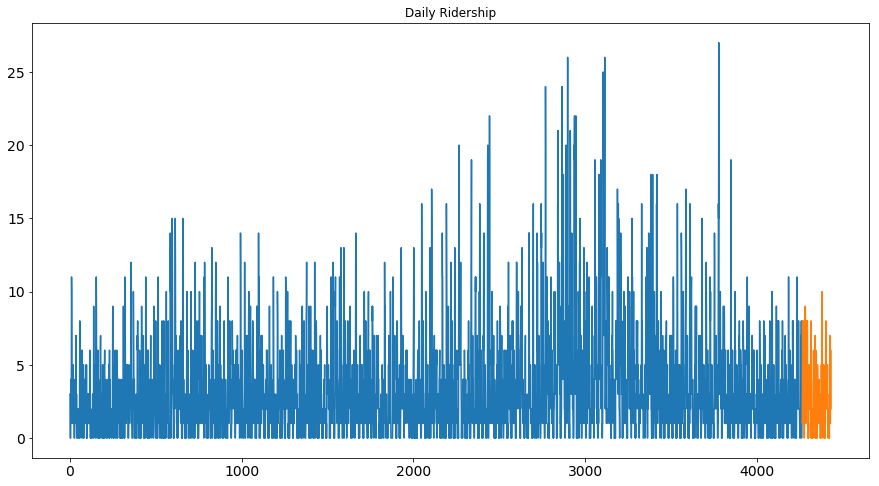

In [157]:
#Plotting data
train['count'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test['count'].plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

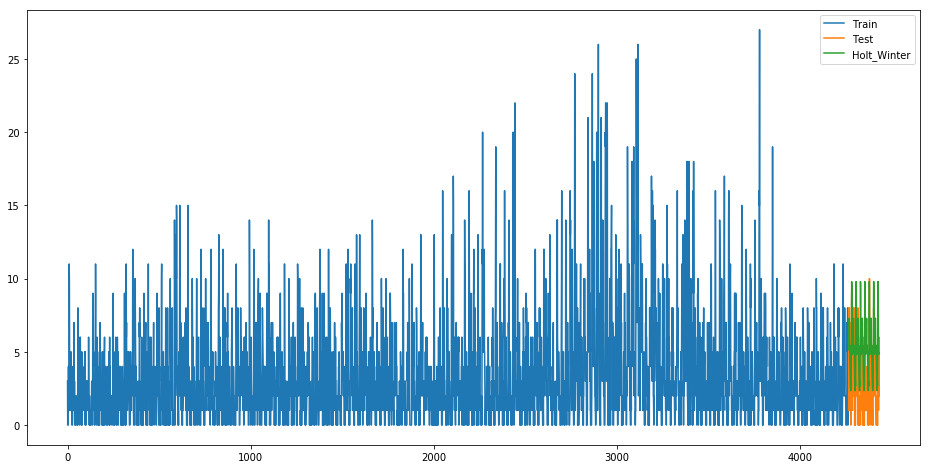

In [158]:
y_hat_avg_2 = test.copy()
fit2 = ExponentialSmoothing(np.asarray(train['count']) ,seasonal_periods=24 ,trend='add', seasonal='add',).fit()
y_hat_avg_2['Holt_Winter'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['count'], label='Train')
plt.plot(test['count'], label='Test')
plt.plot(y_hat_avg_2['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

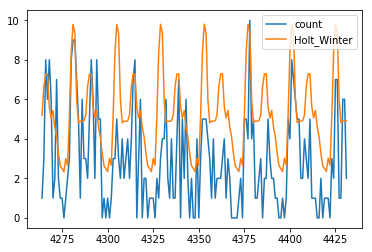

In [149]:
y_hat_avg_2[['count', 'Holt_Winter']].plot()

In [39]:
rmse = []
rmse_norm = []
for ser in new_cluster:
    ser = ser.reset_index()
    ser.columns = ['date', 'count']
    train = ser[:-168]
    test = ser[-168:]
    y_hat_avg = test.copy()
    fit = ExponentialSmoothing(np.asarray(train['count']) ,seasonal_periods=24 ,trend='add', seasonal='add',).fit()
    y_hat_avg['Holt_Winter'] = fit.forecast(len(test))
    rms = math.sqrt(mean_squared_error(y_hat_avg['count'], y_hat_avg['Holt_Winter']))
    rmse.append(rms)
    print(rms)
   

1.8098768350598637
2.2618121638871074
2.2995160214764656
2.3729923061198495
1.671424647556821
0.4811607121907076
2.418370335430896
0.5510842459474679
5.945450891121168
2.6186580251346188
2.6444805108633203
0.10910947542994416
3.943177996598405
2.290527838714477
2.874835425013007
0.23639551738462006
3.575113328453137
1.8819491931004542
1.2398068121237235e-09
2.6804549718024733
0.22484338868932277
2.1479231029382557
2.9858536811146563
0.34996045922397473
3.100086113367575
2.3225326698504456
1.3953831130669103
0.10997035021353994
1.1657314993534327
1.8066065798375701
5.1074112969180705
2.3667027364445565
0.30416107539212045
0.7808113129773523
0.10910903725913372
3.450498717080012
1.5856651816433291
0.4134120898211046
0.9574013521218983
1.0828150490611619
3.0419917137186734
0.15422221178247336
2.741529894925946


In [44]:
rmse = pd.DataFrame(rmse)
rmse.head()

,0
0,3.017836
1,2.640963
2,2.432058
3,1.030628
4,2.129779


In [41]:
len(rmse)

100

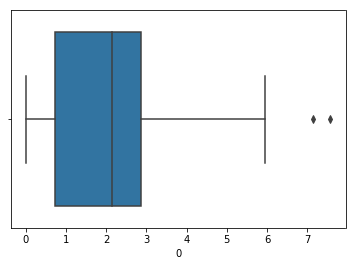

In [47]:
sns.boxplot(rmse[0])

In [51]:
rmse.describe()

,0
count,1.000000e+02
mean,2.112140e+00
std,1.578523e+00
min,1.239807e-09
25%,7.243185e-01
50%,2.138851e+00
75%,2.870346e+00
max,7.574529e+00
